# Classification of Iris Genus flowers with the help of Support Vector Machine (SVM) and Cross-validation

In [427]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [234]:
# setting default parameters of matplotlib for figure size and fontsize
mpl.rc('figure', figsize = (4,3), dpi=300)
mpl.rc('font', size= 8)

In [428]:
# loading the dataset
df = sns.load_dataset('iris')

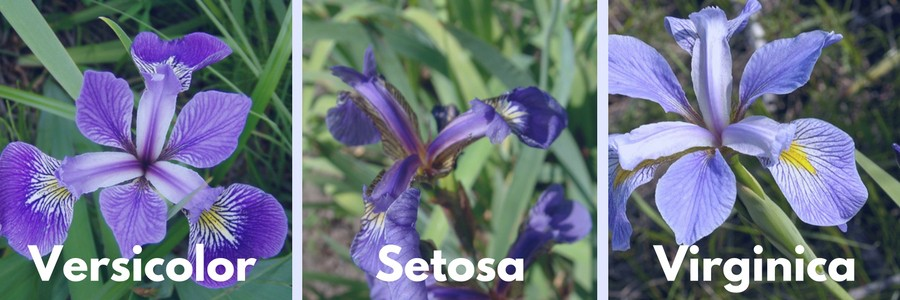

In [236]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [237]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Plotting pairplot to see the relationship between the different features

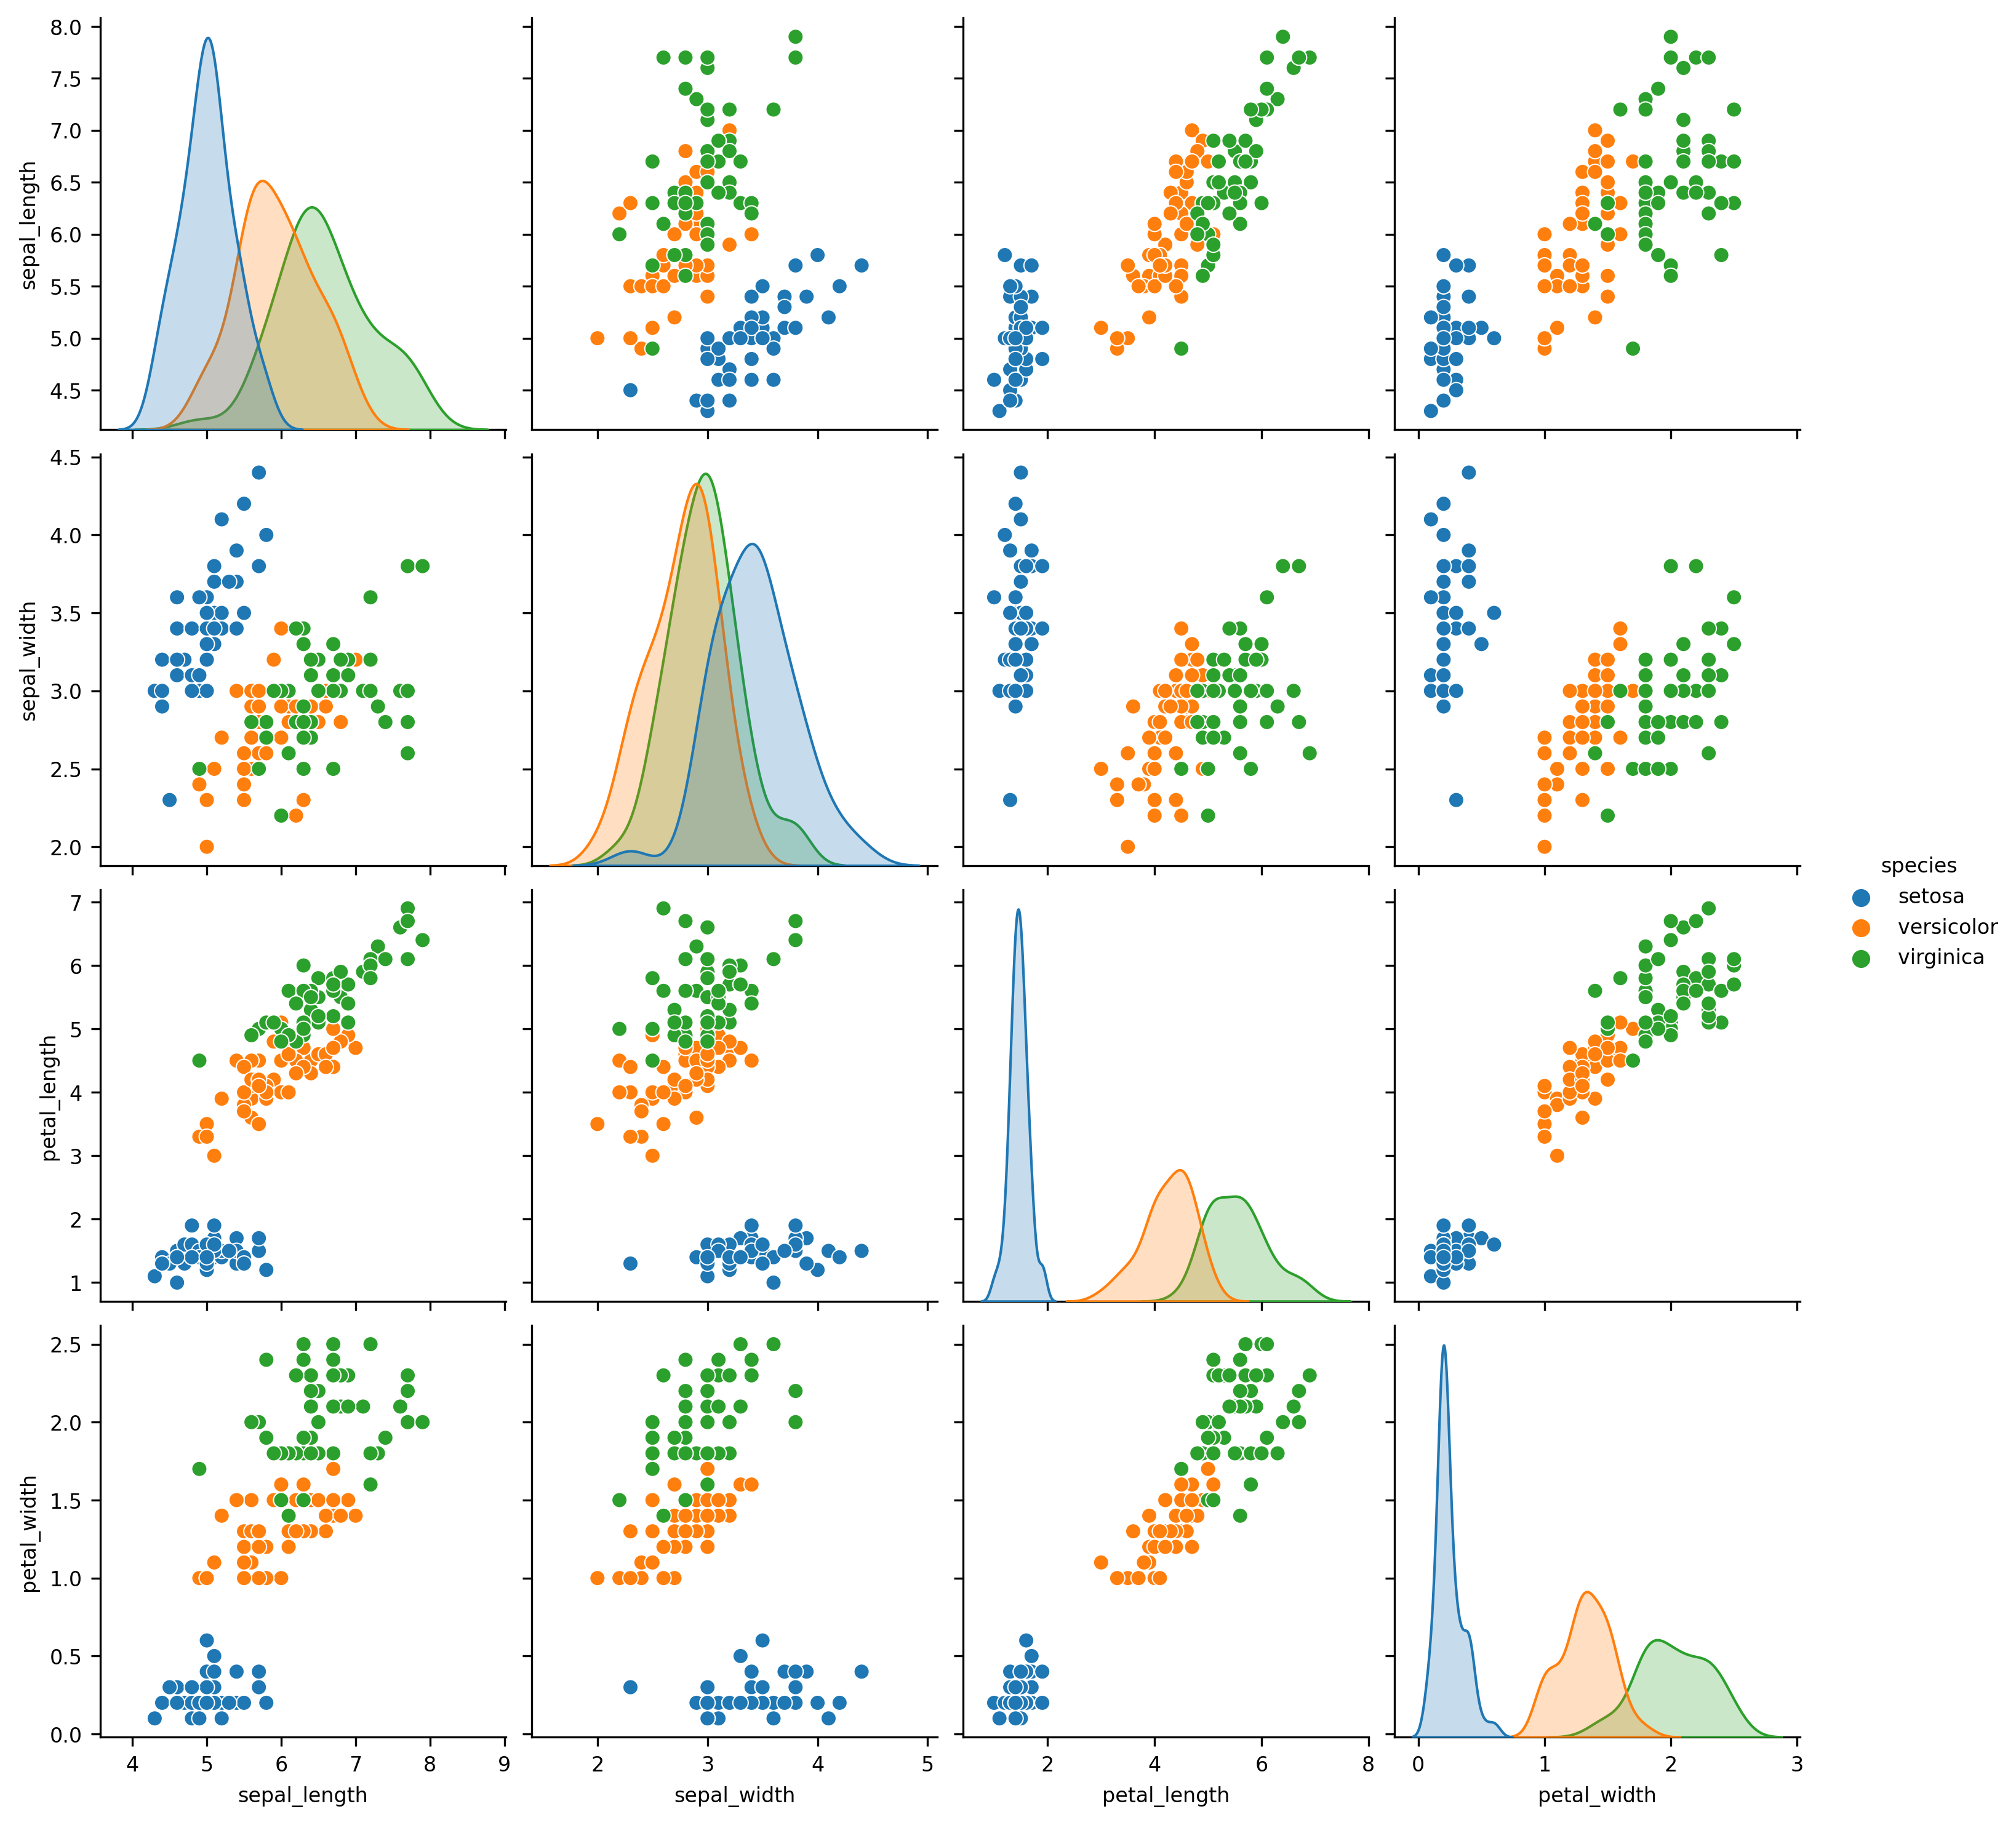

In [251]:
sns.pairplot(df, hue='species');

### Plotting the mean values of features

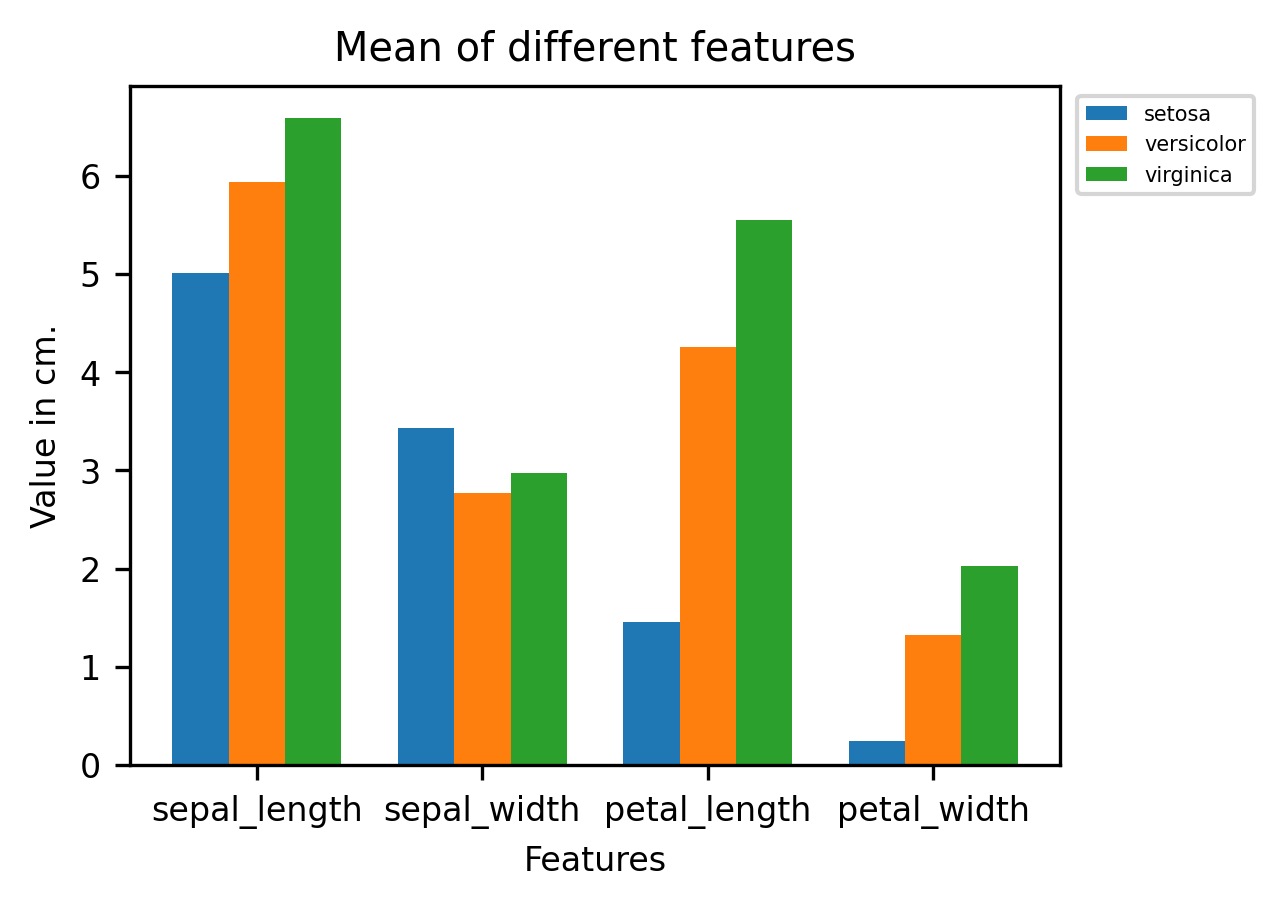

In [426]:
means = []
for i in df['species'].unique():
    means.append(df[df['species'] == i][['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].mean().values)

x = np.arange(len(df.columns)-1)
plt.bar(x-0.25, means[0], width=0.25, label=df['species'].unique()[0])
plt.bar(x, means[1], width=0.25, label=df['species'].unique()[1])
plt.bar(x+0.25, means[2], width=0.25, label=df['species'].unique()[2])
plt.xticks(x,labels=df.drop('species', axis=1).columns)
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.title('Mean of different features')
plt.legend(bbox_to_anchor=(1.22,1), fontsize=5)
plt.show()

### since the data has very few rows (only 150) we are going to use K-fold cross validation

In [412]:
from sklearn.model_selection import KFold
from sklearn.svm import SVC
# ṭaking k as 10
kf = KFold(n_splits=10, shuffle=True)
svn = SVC()
X,y = df.drop('species', axis=1), df['species']

scores = []
for i in range(10):
    result = next(kf.split(df.drop('species', axis=1)), None)
    X_train = X.iloc[result[0]]
    X_test = X.iloc[result[1]]
    y_train = y.iloc[result[0]]
    y_test = y.iloc[result[1]]
    model = svn.fit(X_train, y_train)
    pred = svn.predict(X_test)
    scores.append(model.score(X_test, y_test))

### Mean Model Score

In [423]:
np.mean(scores)

0.9466666666666667

### Generating new data to test the model

In [424]:
X_new = np.array([[3, 2, 1, 0.2], [  4.9, 2.2, 3.8, 1.1 ], [  5.3, 2.5, 4.6, 1.9 ]])

### Saving and Loading the model

In [421]:
# Saving the model as a pickle file
import pickle
with open('iris_classification_SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)
    
    
# Loading the model
with open('iris_classification_SVM.pickle', 'rb') as f:
    model = pickle.load(f)
model.predict(X_new)

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Prediction seems to be correct because the Setosa is shortest and Virginica is the longest and Versicolor is in between these two.